# SVM on Iris Dataset

This project is one of my Machine Learning mini projects. For this project, we have an Iris dataset introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis.The Iris dataset contains measurements for 150 Iris flowers from three different species. 

The three classes in the Iris dataset:
- Iris-setosa (n=50)
- Iris-versicolor (n=50)
- Iris-virginica (n=50)

The four features of the Iris dataset:

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

The goal of this project is to create a Support Vector Machine (SVM) Classifier model to classify flowers from the Iris dataset into different categories.

In [0]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Data
The dataset is built into seaborn, so we can use the library to import the data.

In [0]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Exploratory Data Analysis (EDA)
Before we begin fitting a SVM Classifier model on the data, let's try and eyeball it first.

Here, we will visualize the data in pairplots.

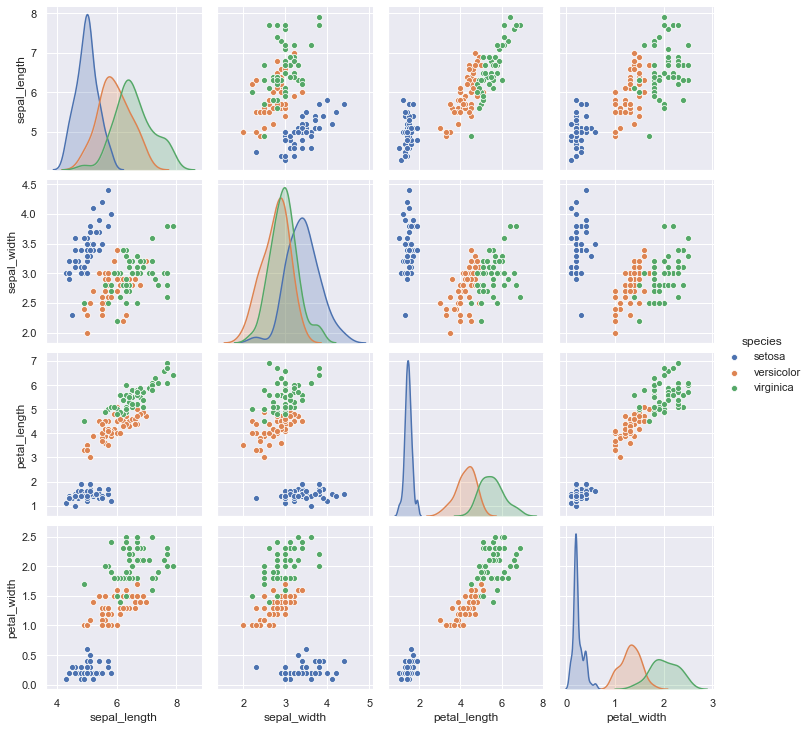

In [0]:
sns.pairplot(iris,hue='species')
plt.show()

From the pairplot above, we can see that the setosa species seems to be the most separable of the three.

## Building The Model 
Finally, we can build our SVM Classifier model from the Iris dataset. 

In [0]:
# Declaring the features and the label
features = iris.drop('species',axis=1)
label = iris['species']

In [0]:
# Splitting the data
from sklearn.model_selection import train_test_split

# Split the data between training and test sets, in a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3)

In [0]:
# Build and fit the model
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Predictions and Evaluations

In [0]:
# Making predictions
pred = clf.predict(X_test)

In [0]:
# Create a Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[13  0  0]
 [ 0 12  2]
 [ 0  0 18]]


In [0]:
# Create a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.86      0.92        14
   virginica       0.90      1.00      0.95        18

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



Based on the results above, it seems like our model did pretty well! However, we can try and improve the results by tuning the hyperparameters for the classifier.

## Hyperparameter Tuning
Here, we are going to use Scikit's inbuilt 'GridSearch' module to tune the hyperparameters for the classifier. The hyperparameters that we will tune includes the C and Gamma.

In [0]:
# Importing the module
from sklearn.model_selection import GridSearchCV

In [1]:
# Defining the initial parameter grid to search in
c_range = [0.1,1, 10, 100]
gamma_range = [1,0.1,0.01,0.001]
param_grid = dict(C = c_range, gamma = gamma_range)

param_grid

{'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

In [0]:
grid = GridSearchCV(SVC(),param_grid,refit=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

## New Predictions and Results

In [0]:
# Making predictions
grid_pred = grid.predict(X_test)

In [0]:
# Create a Confusion Matrix
print(confusion_matrix(y_test,grid_pred))

[[13  0  0]
 [ 0 13  1]
 [ 0  0 18]]


In [0]:
# Create a classification report
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.93      0.96        14
   virginica       0.95      1.00      0.97        18

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Based on the new results above, it seems like our model has done a little better this time with only one point that we couldn't grab. However, in real world applications, this could be a good thing because we don't want a model that fully overfits the taining set.